Import the necessary modules. We need stationarity from ntrfc and some other modules for the definition of a signal and for rendering a plot

In [11]:
from ntrfc.timeseries.stationarity import estimate_stationarity
import numpy as np
import matplotlib.pyplot as plt

Lets define a signal generator. We want to generate a signal with some noise, an initial transient and a constant deterministic fluctuation.

In [ ]:
def signalgen_abatingsine(amplitude, noiseamplitude, frequency, mean, abate, time):
    resolution = 24
    step = (1 / frequency) / resolution

    times = np.arange(0, time, step)
    noise = np.random.normal(-1, 1, len(times)) * noiseamplitude

    values = amplitude * np.sin(frequency * (2 * np.pi) * times) + mean + np.e ** -(times * abate) + noise
    return times, values

Lets define the input arguments for the signal generator and lets generate a signal.

In [46]:
test_amplitudes = 0.1
test_noiseamplitude = 0.01
test_frequencies = 6
test_times = 20
test_mean = -1
test_abate = 2


timesteps, values = signalgen_abatingsine(amplitude=test_amplitudes, noiseamplitude=test_noiseamplitude,
                                          frequency=test_frequencies, mean=test_mean, time=test_times,
                                          abate=test_abate)


Lets compute the index of the stationary timestep.

In [47]:
stationary_timestep = estimate_stationarity(values)

well_computed_stationarity_limit = -np.log(0.05) / test_abate
well_computed_stationary_time = timesteps[-1] - well_computed_stationarity_limit
stationary_time = timesteps[-1] - stationary_timestep


Lets plot the result

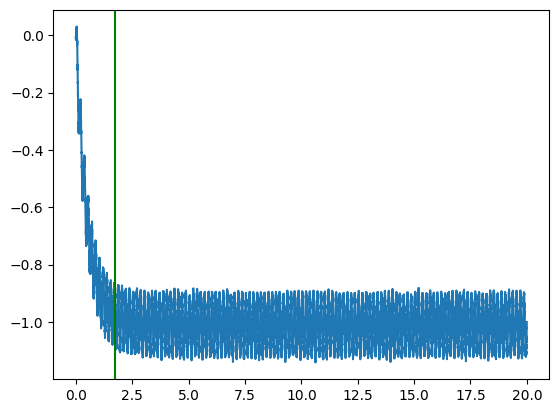

In [49]:
plt.figure()
plt.plot(timesteps, values)
plt.axvline(timesteps[stationary_timestep], color="green")
plt.show()

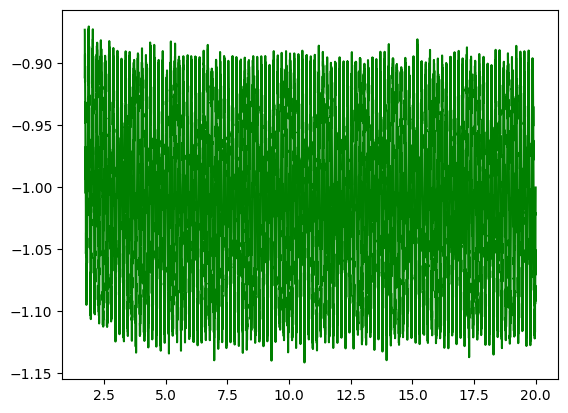

In [51]:
plt.figure()
plt.plot(timesteps[stationary_timestep:],values[stationary_timestep:], color="green")
plt.show()
